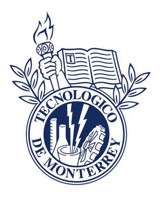

## Instituto Tecnológico y de Estudios Superiores de Monterrey

## Proyecto Integrador

## Dr. Luis Eduardo Falcón Morales

<table text-align="left">
  <tr>
    <th style="text-align:center;">Name</th>
    <th style="text-align:center;">Student ID</th>
  </tr>
  <tr>
    <td style="text-align:left;">Estefania Abigail Castro Belmont</td>
    <td style="text-align:left;">A01332636</td>
  </tr>
  <tr>
    <td style="text-align:left;">Roberto Carlos Avelar Sigüenza</td>
    <td style="text-align:left;">A01016798</td>
  </tr>
  <tr>
    <td style="text-align:left;">Nicolas Mojica Gómez</td>
    <td style="text-align:left;">A01794354</td>
  </tr>
</table>

Cuando se trabaja en un proyecto de ML, es común explorar y comparar varios modelos para determinar cuál se ajusta mejor a los datos y produce las predicciones más precisas. Una vez que has establecido un modelo de referencia o baseline, es momento de construir modelos alternativos. Estos modelos pueden diferir en términos de complejidad, enfoque matemático, suposiciones subyacentes y la manera en que manejan los datos.

Hay un sinfín de algoritmos de ML y nuevos algoritmos siguen siendo desarrollados y explorados, por tanto, puedes perderte durante la construcción de los modelos alternativos. Asegúrate de dirigir tus esfuerzos al tipo de tarea que estás abordando. Una vez que has obtenido un número considerable de modelos alternativos, enfócate en los más prometedores en términos de la métrica de desempeño que es importante para tu caso de negocio. Ahora necesitas ajustarlos…

**Recordemos la distinción entre parámetros e hiperparámetros en el contexto de un modelo de aprendizaje automático**


*   Un parámetro constituye una variable interna del modelo cuyo valor se estima a partir de los datos de entrenamiento. En otras palabras, los parámetros son aprendidos durante el proceso de entrenamiento, y el algoritmo de aprendizaje automático optimiza sus valores. En este sentido, el científico de datos no establece manualmente dichos parámetros. Por ejemplo, los coeficientes de la ecuación ***y = 30 + 2.5x*** en una regresión lineal son calculados con base en los datos de entrada.

*   No obstante, existen variables que no pueden aprenderse durante el entrenamiento de un solo modelo; a estas se les denomina **hiperparámetros**. Los hiperparámetros influyen en el funcionamiento del algoritmo de aprendizaje, pero no son optimizados automáticamente por el proceso de entrenamiento del modelo.

Un ejemplo ilustrativo es el tamaño de la hoja en los árboles de decisión. Dado que este valor no es generado automáticamente por los datos, sino que debe ser establecido externamente, se clasifica como un hiperparámetro. Este hiperparámetro puede impactar la precisión del modelo de árbol, y, por ende, es crucial encontrar valores apropiados. Aunque podría llevarse a cabo mediante búsqueda manual, esto suele convertirse en un proceso de prueba y error, por lo que se emplean enfoques automatizados para abordar esta tarea. Los dos más comunes son: búsqueda de cuadrícula (grid search) y búsqueda aleatoria (random search).

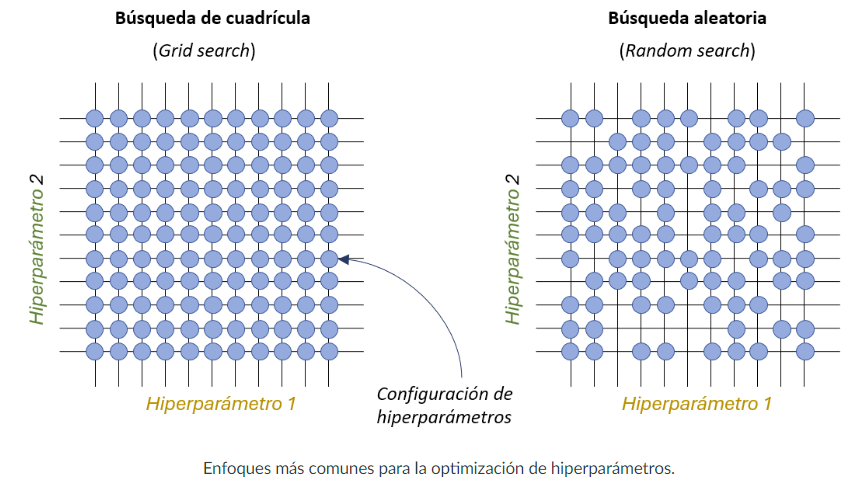

**Rúbrica.** *(Comparativa)* Se construyen al menos ***6 modelos*** diferentes (individuales, no ensambles), utilizando algoritmos variados. Se ordenan por la métrica principal, aunque la comparativa debe incluir al menos otras dos métricas relevantes y los tiempos de entrenamiento.

En nuestro caso proponemos utilizar los siguientes modelos, queremos resaltar que cada uno de estos modelos tiene sus propias fortalezas y debilidades y la elección del modelo la haremos de acuerdo a lo solicitado en la rúbrica utilizando las métricas.

### **Modelos de Machine Learning**

**Regresión Logística:** Modelo lineal simple y eficiente para clasificación binaria que puede utilizarse con representaciones TF-IDF o embeddings para manejar texto.

**Máquina de Soporte Vectorial (SVM):** Modelo que busca maximizar el margen entre las clases y es eficaz con representaciones vectoriales de texto como TF-IDF o embeddings.

**Naive Bayes:** Modelo probabilístico basado en el teorema de Bayes asumiendo independencia entre características, es Especialmente adecuado para clasificación de texto con representaciones de frecuencia o TF-IDF.

**Random Forest:** Modelo de conjunto que utiliza múltiples árboles de decisión que puede manejar representaciones vectoriales de texto y es robusto frente al sobreajuste.

### **Modelos de Deep Learning**

**Red Neuronal Recurrente (RNN) con LSTM:** Red neuronal diseñada para procesar secuencias de datos y capturar dependencias temporales que es excelente para tareas de texto donde el contexto de las palabras es importante.

### **Modelos LLM**

**BERT (Bidirectional Encoder Representations from Transformers):** Modelo basado en la arquitectura de transformadores, preentrenado en una gran cantidad de datos de texto y ajustado para tareas específicas, captura relaciones complejas en el texto y ofrece un rendimiento de vanguardia en muchas tareas de procesamiento del lenguaje natural (NLP).

## **Desarrollo de los Modelos de Machine Learning**

**Implementación de Regresión Logística** para clasificar los descriptivos del perfil en modo texto según el género junto con la evaluación del modelo y la importancia de las características. También permite al usuario introducir un descriptivo y obtener una predicción del género.

In [ ]:
#Importamos las Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import time

In [ ]:
# Cargamos los datos desde el archivo de Excel
data = pd.read_excel('/content/sample_data/descriptivos oracle.xlsx')

In [ ]:
# Separamos las características (X) y la etiqueta (y)
X = data['Descriptivo']
y = data['Género']

In [ ]:
#Convertimos el texto en representaciones numéricas utilizando TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Medimos el tiempo de entrenamiento
start_time = time.time()

# Creamos y entrenamos el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time:.2f} segundos')

Tiempo de entrenamiento: 0.07 segundos


In [ ]:
# Hacemos las predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Femenino')
recall = recall_score(y_test, y_pred, pos_label='Femenino')
f1 = f1_score(y_test, y_pred, pos_label='Femenino')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Precision: 0.967741935483871
Recall: 0.967741935483871
F1 Score: 0.967741935483871

Classification Report:
               precision    recall  f1-score   support

    Femenino       0.97      0.97      0.97        31
   Masculino       0.97      0.97      0.97        29

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
# Obtenemos la importancia de las características
feature_names = vectorizer.get_feature_names_out()
importance = np.abs(model.coef_[0])

# Creamos un DataFrame con las características y su importancia
features_df = pd.DataFrame({'feature': feature_names, 'importance': importance})

# Ordenamos las características por importancia
features_df = features_df.sort_values(by='importance', ascending=False)

print(features_df.head(10))  # Mostramos las 10 características más importantes

        feature  importance
2082        una    3.027833
1243       juan    2.585276
2081         un    2.503788
1340      maría    2.348763
1290         lo    1.749632
1248         la    1.453595
287      carlos    1.201716
118         ana    1.119156
1160  ingeniera    1.055101
1161  ingeniero    1.047384


In [ ]:
#Realizamos una predicción basada en la entrada del usuario
def predict_gender(descriptivo):
    # Convertir la entrada del usuario en un vector TF-IDF
    descriptivo_tfidf = vectorizer.transform([descriptivo])

    # Hacer la predicción
    prediction = model.predict(descriptivo_tfidf)

    return prediction[0]

In [ ]:
# Ejemplo
descriptivo_usuario = input("Ingrese el descriptivo: ")
prediccion = predict_gender(descriptivo_usuario)
print(f'El género predicho es: {prediccion}')

Ingrese el descriptivo: Ana es una especialista en soporte técnico con un desempeño regular. A pesar de que su performance no es sobresaliente, Ana destaca por su constancia, responsabilidad y dedicación en su trabajo. Es una persona puntual y comprometida, capaz de cumplir con sus tareas diarias de manera eficiente. Su atención al detalle y capacidad para seguir instrucciones la convierten en una pieza clave en cualquier equipo de soporte técnico. Aunque su desempeño puede fluctuar, Ana demuestra una gran disposición para aprender y mejorar continuamente, lo que la convierte en una candidata con potencial de crecimiento en el área de soporte técnico. Su actitud positiva y su capacidad para trabajar en equipo también son aspectos destacables, ya que Ana siempre está dispuesta a colaborar con sus colegas para lograr los objetivos establecidos. En resumen, Ana es una profesional con una base sólida en soporte técnico, con habilidades que pueden ser pulidas y perfeccionadas a lo largo de 

**Implementación de Máquina de Soporte Vectorial (SVM)** para clasificar clasificar los descriptivos del perfil en modo texto según el género junto con la evaluación del modelo y la importancia de las características. Además, permite al usuario introducir un descriptivo y obtener una predicción del género

In [ ]:
#Importamos las Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import time

In [ ]:
# Cargamos los datos desde el archivo de Excel
data = pd.read_excel('/content/sample_data/descriptivos oracle.xlsx')

In [ ]:
# Separamos las características (X) y la etiqueta (y)
X = data['Descriptivo']
y = data['Género']

In [ ]:
# Convertimos el texto en vectores TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Medimos el tiempo de entrenamiento
start_time = time.time()

# Creamos y entrenamos el modelo de SVM
model = SVC(kernel='linear', probability=True)  # Usamos un kernel lineal para interpretar la importancia de las características
model.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time:.2f} segundos')

Tiempo de entrenamiento: 0.40 segundos


In [ ]:
# Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [ ]:
# Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Femenino')
recall = recall_score(y_test, y_pred, pos_label='Femenino')
f1 = f1_score(y_test, y_pred, pos_label='Femenino')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

    Femenino       1.00      1.00      1.00        31
   Masculino       1.00      1.00      1.00        29

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [ ]:
# Obtenemos la importancia de las características
feature_names = vectorizer.get_feature_names_out()
importance = np.abs(model.coef_.toarray()[0])

In [ ]:
# Creamos un DataFrame con las características y su importancia
features_df = pd.DataFrame({'feature': feature_names, 'importance': importance})


In [ ]:
# Ordenamos las características por importancia
features_df = features_df.sort_values(by='importance', ascending=False)

In [ ]:
print(features_df.head(10))  # Mostramos las 10 características más importantes

        feature  importance
2082        una    2.878091
2081         un    2.634635
1243       juan    2.384529
1340      maría    1.898825
1290         lo    1.744713
1248         la    1.571098
1258      laura    1.212491
118         ana    1.174325
1161  ingeniero    1.158836
287      carlos    1.146970


In [ ]:
#Realizamos una predicción basada en la entrada del usuario
def predict_gender(descriptivo):
    # Convertir la entrada del usuario en un vector TF-IDF
    descriptivo_tfidf = vectorizer.transform([descriptivo])

    # Hacer la predicción
    prediction = model.predict(descriptivo_tfidf)

    return prediction[0]

In [ ]:
# Ejemplo
descriptivo_usuario = input("Ingrese el descriptivo: ")
prediccion = predict_gender(descriptivo_usuario)
print(f'El género predicho es: {prediccion}')

Ingrese el descriptivo: Ana es una especialista en soporte técnico con un desempeño regular. A pesar de que su performance no es sobresaliente, Ana destaca por su constancia, responsabilidad y dedicación en su trabajo. Es una persona puntual y comprometida, capaz de cumplir con sus tareas diarias de manera eficiente. Su atención al detalle y capacidad para seguir instrucciones la convierten en una pieza clave en cualquier equipo de soporte técnico. Aunque su desempeño puede fluctuar, Ana demuestra una gran disposición para aprender y mejorar continuamente, lo que la convierte en una candidata con potencial de crecimiento en el área de soporte técnico. Su actitud positiva y su capacidad para trabajar en equipo también son aspectos destacables, ya que Ana siempre está dispuesta a colaborar con sus colegas para lograr los objetivos establecidos. En resumen, Ana es una profesional con una base sólida en soporte técnico, con habilidades que pueden ser pulidas y perfeccionadas a lo largo de 

**Implementación de Naive Bayes** para clasificar los descriptivos del perfil en modo texto según el género junto con la evaluación del modelo y la importancia de las características. Además, permite al usuario introducir un descriptivo y obtener una predicción del género.

In [ ]:
 #Importamos de Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import time

In [ ]:
# Cargamos los datos desde un archivo de Excel
data = pd.read_excel('/content/sample_data/descriptivos oracle.xlsx')

# Separar las características (X) y la etiqueta (y)
X = data['Descriptivo']
y = data['Género']

In [ ]:
# Convertimos el texto en vectores TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Medimos el tiempo de entrenamiento
start_time = time.time()

# Creamos y entrenamos el modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time:.2f} segundos')

Tiempo de entrenamiento: 0.01 segundos


In [ ]:
# Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Femenino')
recall = recall_score(y_test, y_pred, pos_label='Femenino')
f1 = f1_score(y_test, y_pred, pos_label='Femenino')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95
Precision: 0.9117647058823529
Recall: 1.0
F1 Score: 0.9538461538461539

Classification Report:
               precision    recall  f1-score   support

    Femenino       0.91      1.00      0.95        31
   Masculino       1.00      0.90      0.95        29

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
# Obtenemos la importancia de las características
feature_names = vectorizer.get_feature_names_out()
importance = model.feature_log_prob_[1]  # Clase 'Femenino' es la primera clase

# Creamos un DataFrame con las características y su importancia
features_df = pd.DataFrame({'feature': feature_names, 'importance': importance})

# Ordenamos las características por importancia
features_df = features_df.sort_values(by='importance', ascending=False)

print(features_df.head(10))  # Mostrar las 10 características más importantes

     feature  importance
565       de   -4.761261
1977      su   -4.871427
804       en   -4.986755
2081      un   -5.249421
1243    juan   -5.587398
1521    para   -5.615573
1745     que   -5.628433
408      con   -5.652913
1290      lo   -5.717205
850       es   -5.740730


In [ ]:
#Realizamos una predicción basada en la entrada del usuario
def predict_gender(descriptivo):
    # Convertir la entrada del usuario en un vector TF-IDF
    descriptivo_tfidf = vectorizer.transform([descriptivo])

    # Hacer la predicción
    prediction = model.predict(descriptivo_tfidf)

    return prediction[0]


In [ ]:
# Ejemplo de uso
descriptivo_usuario = input("Ingrese el descriptivo: ")
prediccion = predict_gender(descriptivo_usuario)
print(f'El género predicho es: {prediccion}')

Ingrese el descriptivo: Ana es una especialista en soporte técnico con un desempeño regular. A pesar de que su performance no es sobresaliente, Ana destaca por su constancia, responsabilidad y dedicación en su trabajo. Es una persona puntual y comprometida, capaz de cumplir con sus tareas diarias de manera eficiente. Su atención al detalle y capacidad para seguir instrucciones la convierten en una pieza clave en cualquier equipo de soporte técnico. Aunque su desempeño puede fluctuar, Ana demuestra una gran disposición para aprender y mejorar continuamente, lo que la convierte en una candidata con potencial de crecimiento en el área de soporte técnico. Su actitud positiva y su capacidad para trabajar en equipo también son aspectos destacables, ya que Ana siempre está dispuesta a colaborar con sus colegas para lograr los objetivos establecidos. En resumen, Ana es una profesional con una base sólida en soporte técnico, con habilidades que pueden ser pulidas y perfeccionadas a lo largo de 

**Implementación de Random Forest** para clasificar los descriptivos del perfil en modo texto según el género junto con la evaluación del modelo y la importancia de las características. Además, permite al usuario introducir un descriptivo y obtener una predicción del género.

In [ ]:
#Importamos las Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import time

In [ ]:
# Cargamos los datos desde el archivo de Excel
data = pd.read_excel('/content/sample_data/descriptivos oracle.xlsx')

In [ ]:
# Separarmos las características (X) y la etiqueta (y)
X = data['Descriptivo']
y = data['Género']

In [ ]:
# Convertimos el texto en vectores TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Medimos el tiempo de entrenamiento
start_time = time.time()

# Creamos y entrenamos el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

end_time = time.time()
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time:.2f} segundos')

Tiempo de entrenamiento: 0.48 segundos


In [ ]:
# Hacemos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Femenino')
recall = recall_score(y_test, y_pred, pos_label='Femenino')
f1 = f1_score(y_test, y_pred, pos_label='Femenino')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95
Precision: 0.9375
Recall: 0.967741935483871
F1 Score: 0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

    Femenino       0.94      0.97      0.95        31
   Masculino       0.96      0.93      0.95        29

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
# Obtenemos la importancia de las características
feature_importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Creamos un DataFrame con las características y su importancia
features_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Ordenamos las características por importancia
features_df = features_df.sort_values(by='importance', ascending=False)

print(features_df.head(10))  # Mostramos las 10 características más importantes

           feature  importance
2081            un    0.081893
2082           una    0.046791
1243          juan    0.041787
1290            lo    0.032861
1340         maría    0.024034
1160     ingeniera    0.017193
390   comprometida    0.015330
728      dispuesta    0.014832
1161     ingeniero    0.014191
1248            la    0.013958


In [ ]:
#Hacemos una predicción basada en la entrada del usuario
def predict_gender(descriptivo):
    # Convertir la entrada del usuario en un vector TF-IDF
    descriptivo_tfidf = vectorizer.transform([descriptivo])

    # Hacer la predicción
    prediction = model.predict(descriptivo_tfidf)

    return prediction[0]

In [ ]:
#Ejemplo
descriptivo_usuario = input("Ingrese el descriptivo: ")
prediccion = predict_gender(descriptivo_usuario)
print(f'El género predicho es: {prediccion}')

Ingrese el descriptivo: Ana es una especialista en soporte técnico con un desempeño regular. A pesar de que su performance no es sobresaliente, Ana destaca por su constancia, responsabilidad y dedicación en su trabajo. Es una persona puntual y comprometida, capaz de cumplir con sus tareas diarias de manera eficiente. Su atención al detalle y capacidad para seguir instrucciones la convierten en una pieza clave en cualquier equipo de soporte técnico. Aunque su desempeño puede fluctuar, Ana demuestra una gran disposición para aprender y mejorar continuamente, lo que la convierte en una candidata con potencial de crecimiento en el área de soporte técnico. Su actitud positiva y su capacidad para trabajar en equipo también son aspectos destacables, ya que Ana siempre está dispuesta a colaborar con sus colegas para lograr los objetivos establecidos. En resumen, Ana es una profesional con una base sólida en soporte técnico, con habilidades que pueden ser pulidas y perfeccionadas a lo largo de 

## **Desarrollo de los Modelos de Modelos de Deep Learning**

**Implementación de Red Neuronal Recurrente (RNN) con LSTM** para clasificar los descriptivos del perfil en modo texto según el género junto con la evaluación del modelo y la importancia de las características. Además, permite al usuario introducir un descriptivo y obtener una predicción del género. Para las redes neuronales, especialmente LSTM, no se obtiene una importancia de características de la misma manera que con modelos basados en árboles.

In [ ]:
#Importamos las bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time

In [ ]:
# Cargamos los datos desde el archivo de Excel
data = pd.read_excel('/content/sample_data/descriptivos oracle.xlsx')

In [ ]:
# Separamos las características (X) y la etiqueta (y)
X = data['Descriptivo']
y = data['Género']

In [ ]:
# Convertimos las etiquetas a valores numéricos
y = y.map({'Femenino': 0, 'Masculino': 1})

# Tokenización y secuenciación
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Padding de secuencias
X_padded = pad_sequences(X_sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [ ]:
# Definimos el modelo LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Medimos el tiempo de entrenamiento
start_time = time.time()

# Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

end_time = time.time()
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time:.2f} segundos')


Epoch 1/5
6/6 [==============================] - 11s 497ms/step - loss: 0.6902 - accuracy: 0.5469 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 2/5
6/6 [==============================] - 1s 161ms/step - loss: 0.6724 - accuracy: 0.5625 - val_loss: 0.6669 - val_accuracy: 0.5000
Epoch 3/5
6/6 [==============================] - 1s 158ms/step - loss: 0.6289 - accuracy: 0.6094 - val_loss: 0.6083 - val_accuracy: 0.7083
Epoch 4/5
6/6 [==============================] - 1s 186ms/step - loss: 0.5015 - accuracy: 0.8438 - val_loss: 0.4203 - val_accuracy: 0.9167
Epoch 5/5
6/6 [==============================] - 1s 180ms/step - loss: 0.2446 - accuracy: 0.9740 - val_loss: 0.1446 - val_accuracy: 0.9792
Tiempo de entrenamiento: 15.50 segundos


In [ ]:
# Hacemos predicciones en el conjunto de prueba
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


2/2 [==============================] - 2s 68ms/step
Accuracy: 0.9166666666666666
Precision: 0.8529411764705882
Recall: 1.0
F1 Score: 0.9206349206349206

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        31
           1       0.85      1.00      0.92        29

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.93      0.92      0.92        60



In [ ]:
#hacemos la predicción basada en la entrada del usuario
def predict_gender(descriptivo):
    # Convertimos la entrada del usuario en una secuencia
    descriptivo_seq = tokenizer.texts_to_sequences([descriptivo])
    descriptivo_padded = pad_sequences(descriptivo_seq, maxlen=100, padding='post', truncating='post')

    # Hacemos la predicción
    prediction_prob = model.predict(descriptivo_padded)
    prediction = (prediction_prob > 0.5).astype(int).flatten()

    return 'Femenino' if prediction[0] == 0 else 'Masculino'

In [ ]:
# Ejemplo
descriptivo_usuario = input("Ingrese el descriptivo: ")
prediccion = predict_gender(descriptivo_usuario)
print(f'El género predicho es: {prediccion}')

Ingrese el descriptivo: Ana es una especialista en soporte técnico con un desempeño regular. A pesar de que su performance no es sobresaliente, Ana destaca por su constancia, responsabilidad y dedicación en su trabajo. Es una persona puntual y comprometida, capaz de cumplir con sus tareas diarias de manera eficiente. Su atención al detalle y capacidad para seguir instrucciones la convierten en una pieza clave en cualquier equipo de soporte técnico. Aunque su desempeño puede fluctuar, Ana demuestra una gran disposición para aprender y mejorar continuamente, lo que la convierte en una candidata con potencial de crecimiento en el área de soporte técnico. Su actitud positiva y su capacidad para trabajar en equipo también son aspectos destacables, ya que Ana siempre está dispuesta a colaborar con sus colegas para lograr los objetivos establecidos. En resumen, Ana es una profesional con una base sólida en soporte técnico, con habilidades que pueden ser pulidas y perfeccionadas a lo largo de 

## **Desarrollo de los Modelos LLM**

**Implementación de BERT (Bidirectional Encoder Representations from Transformers)** para clasificar los descriptivos del perfil en modo texto según el género junto con la evaluación del modelo y la importancia de las características. También permite al usuario introducir un descriptivo y obtener una predicción del género.

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
    else:
        print("Failed to detect a GPU.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
## from datasets import Dataset

In [ ]:
# Cargar los datos
data = pd.read_excel('descriptivos oracle.xlsx')

In [ ]:
# Mostrar algunas filas de los datos
print(data.head())

                             Profesión     Género      Desempeño  \
0     Especialistas en soporte técnico   Femenino        Regular   
1            Consultores de tecnología  Masculino       Estándar   
2               Ingenieros de sistemas   Femenino        Regular   
3     Especialistas en soporte técnico   Femenino  Sobresaliente   
4  Especialistas en ventas y marketing  Masculino       Estándar   

                                         Descriptivo  
0  Ana es una especialista en soporte técnico con...  
1  Juan es un consultor de tecnología con un dese...  
2  Ana es una ingeniera de sistemas con un desemp...  
3  María es una Especialista en soporte técnico s...  
4  Eduardo es un profesional comprometido con su ...  


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar los datos
data = pd.read_excel('descriptivos oracle final.xlsx')

# Dividir los datos en características y etiquetas
X = data['Descriptivo'].tolist()
y = data['Género'].tolist()

# Codificar las etiquetas: femenino -> 0, masculino -> 1
labels = [0 if g == 'Femenino' else 1 for g in y]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Tokenizar los textos utilizando el tokenizador de BETO
tokenizer = BertTokenizer.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased')
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convertir las etiquetas a tensores de PyTorch
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)

# Crear un conjunto de datos PyTorch
class DescriptivosDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = DescriptivosDataset(train_encodings, train_labels)
test_dataset = DescriptivosDataset(test_encodings, test_labels)

# Cargar el modelo preentrenado de BETO
model = BertForSequenceClassification.from_pretrained('dccuchile/bert-base-spanish-wwm-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import time
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Definir los parámetros de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Crear el objeto de entrenamiento
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Medir el tiempo de entrenamiento
start_time = time.time()
trainer.train()
end_time = time.time()

training_time = end_time - start_time
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")

# Evaluar el modelo
trainer.evaluate()

# Obtener predicciones para el conjunto de prueba
predictions = trainer.predict(test_dataset)

# Calcular métricas de evaluación
accuracy = accuracy_score(test_labels, predictions.predictions.argmax(axis=1))
precision = precision_score(test_labels, predictions.predictions.argmax(axis=1))
recall = recall_score(test_labels, predictions.predictions.argmax(axis=1))
f1 = f1_score(test_labels, predictions.predictions.argmax(axis=1))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

/home/abigail/anaconda3/lib/python3.11/site-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/tmp/ipykernel_17359/3542797012.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Epoch,Training Loss,Validation Loss
1,0.007700,0.002945
2,0.000000,0.000019


/tmp/ipykernel_17359/3542797012.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
/tmp/ipykernel_17359/3542797012.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Tiempo de entrenamiento: 776.62 segundos


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


**CONCLUSIONES**

Después de realizar un análisis exhaustivo para abordar el desafío de generar currículos sin sesgos de género, nos embarcamos en un proceso que implicó la evaluación de seis modelos diferentes de Machine Learning. Estos modelos fueron seleccionados debido a su relevancia en la clasificación de texto y su capacidad para manejar datos complejos.

Iniciamos con modelos clásicos como la Regresión Logística y la Máquina de Soporte Vectorial (SVM). Si bien estos modelos son eficientes y bien establecidos en la comunidad de aprendizaje automático, pronto nos dimos cuenta de que podrían no ser suficientemente sofisticados para capturar las complejidades del lenguaje y los posibles sesgos presentes en los currículos.

El Naive Bayes y Random Forest también fueron considerados en nuestra evaluación. Aunque el Naive Bayes es conocido por su simplicidad y eficacia en problemas de clasificación de texto, su suposición de independencia entre características podría ser una limitación en nuestro contexto. Mientras tanto, Random Forest, siendo un modelo de conjunto robusto, podría no ser lo suficientemente sofisticado para capturar las relaciones más sutiles en el texto.

Dos modelos más avanzados, BERT y la Red Neuronal Recurrente (RNN) con LSTM, mostraron un gran potencial para abordar nuestro desafío. BERT, con su capacidad para comprender el contexto y las relaciones complejas en el texto, se destacó como un favorito temprano en nuestra evaluación. Su preentrenamiento en grandes cantidades de datos de texto y su rendimiento de vanguardia en tareas de procesamiento del lenguaje natural lo convirtieron en una opción muy prometedora.

Por otro lado, la RNN con LSTM demostró ser excelente en la captura de dependencias temporales en secuencias de texto, lo cual es crucial cuando se considera el contexto en la redacción de currículos. Sin embargo, surgieron preocupaciones sobre su propensión al olvido a largo plazo y otros problemas relacionados con el entrenamiento en secuencias largas.

A medida que avanzamos en nuestra investigación, nos mantenemos comprometidos en evaluar rigurosamente estos modelos en términos de su capacidad para generar currículos sin sesgos. Aunque BERT ha surgido como nuestro favorito preliminar debido a su rendimiento de vanguardia y su capacidad para comprender las complejidades del lenguaje, continuamos explorando y afinando nuestra evaluación para asegurarnos de seleccionar el modelo más adecuado para nuestro propósito.







**TIME**

Lo modelos se demoraron en total en correr alrededor de 10 minutos.

